# **IMPORTING THE LIBRABRIES**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# **LOADING THE DATASET**

In [62]:
video_games = pd.read_csv("/content/Video Games Sales.csv")
video_games.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


# **DATA CLEANING AND PREPROCESSING**

***Listing the columns of the dataset***

In [63]:
columns = list(video_games.columns)
columns

['index',
 'Rank',
 'Game Title',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'North America',
 'Europe',
 'Japan',
 'Rest of World',
 'Global',
 'Review']

***Information about the dataset***

In [64]:
print("Database dimension  :",video_games.shape)
print("Database size       :",video_games.size)
video_games.describe()

Database dimension  : (1907, 13)
Database size       : 24791


,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


***Renaming the columns appropriately***

In [65]:
video_games.rename(columns = {'Game Title':'Game_Title','North America':'North_America','Rest of World':'Rest_Of_world'}, inplace = True)

***Checking for unique values in each column***

In [66]:
games = video_games.Game_Title.unique()
print("No. of games:" ,len(games))
genres = video_games.Genre.unique()
print("No. of genres:" ,len(genres))
publishers = video_games.Publisher.unique()
print("No. of publishers:" ,len(publishers))
platforms = video_games.Platform.unique()
print("No. of platforms:" ,len(platforms))

No. of games: 1519
No. of genres: 12
No. of publishers: 95
No. of platforms: 22


***Checking for the missing values in the data*** 

In [67]:
nullvalue_percentage = pd.DataFrame((video_games.isnull().sum())*100/video_games.shape[0]).reset_index()
nullvalue_percentage.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(video_games.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'No. of Null Values']

null_value_table = pd.merge(null_value, nullvalue_percentage, on='Column Name')
null_value_table

,Column Name,No. of Null Values,Null Values Percentage
0,index,0,0.000000
1,Rank,0,0.000000
2,Game_Title,0,0.000000
3,Platform,0,0.000000
4,Year,29,1.520713
5,Genre,0,0.000000
6,Publisher,2,0.104877
7,North_America,0,0.000000
8,Europe,0,0.000000
9,Japan,0,0.000000


***Checking the unique number of game year missing***

In [68]:
game_missedyear = video_games[video_games['Year'].isnull()]["Game_Title"].unique()
print("Number of unique game year missing : ",len(game_missedyear))

Number of unique game year missing :  25


***Handling the missing values by dropping them as they are diverse***

In [69]:
video_games.dropna(axis='rows', subset=['Year'], inplace=True)
video_games.dropna(axis='rows', subset=['Publisher'], inplace=True)

***Rechecking for any missing values in the data***

In [70]:
video_games['Year'].isnull().sum()
video_games['Publisher'].isnull().sum()

0

***Converting the datatype of Years from float to int***

In [71]:
video_games['Year'] = video_games['Year'].astype('int')
video_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1878 non-null   int64  
 1   Rank           1878 non-null   int64  
 2   Game_Title     1878 non-null   object 
 3   Platform       1878 non-null   object 
 4   Year           1878 non-null   int64  
 5   Genre          1878 non-null   object 
 6   Publisher      1878 non-null   object 
 7   North_America  1878 non-null   float64
 8   Europe         1878 non-null   float64
 9   Japan          1878 non-null   float64
 10  Rest_Of_world  1878 non-null   float64
 11  Global         1878 non-null   float64
 12  Review         1878 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 205.4+ KB


In [72]:
min_gsales_value = video_games['Global'].min()
min_gsales_value

0.83

***Checking if sales in each region equals global sales***

In [73]:
test = video_games[video_games['Global']>min_gsales_value]
test[test['Global'] != test['North_America']+test['Europe']+test['Japan']+test['Rest_Of_world']].shape[0]

1024

***Correcting the global sales value***

In [74]:
video_games['Global'] = video_games['North_America'] + video_games['Europe'] + video_games['Japan']+video_games['Rest_Of_world']

# Rechecking
video_games[video_games['Global'] != video_games['North_America'] + video_games['Europe'] + video_games['Japan']+video_games['Rest_Of_world']].shape[0]

0

*Now the data is cleaned and ready for analysis.*




# **EXPLORATORY DATA ANALYSIS & VISUALIZATION**

***Average sales in each country***

In [75]:
NA = round((video_games['North_America'].mean()*1000000),3)
EU = round((video_games['Europe'].mean()*1000000),3)
JP = round((video_games['Japan'].mean()*1000000),3)
Rest = round((video_games['Rest_Of_world'].mean()*1000000),3)
Global = round((video_games['Global'].mean()*1000000),3)
print("The average sales in North America =",NA) 
print("The average sales in Europe =",EU)
print("The average sales in Japan =",JP)
print("The average sales in other regions =",Rest)
print("The average sales globally =",Global)

The average sales in North America = 1262108.626
The average sales in Europe = 710516.507
The average sales in Japan = 320979.766
The average sales in other regions = 207055.378
The average sales globally = 2500660.277


***Barplot to visualize country with highest sales on an average***

In [76]:
colors = ['lightslategray',] * 4
colors[1]='red'
colors[2]='grey'
colors[3]='grey'
colors[0] = 'grey'
bar1 = go.Figure(data=[go.Bar(
    y=['Global','North America', 'Europe', 'Japan',
       'Other'],
    x=[Global,NA,EU,JP,Rest],
    orientation='h',
    marker_color=colors 
)])

bar1.update_layout(title_text='COUNTRY WITH HIGHEST SALES ON AN AVERAGE')
bar1.update_xaxes(title='Average Sales')
bar1.update_yaxes(title='Regions')

***Barplot to visualise global sales of games by platform***

Text(0, 0.5, 'Global Sales')

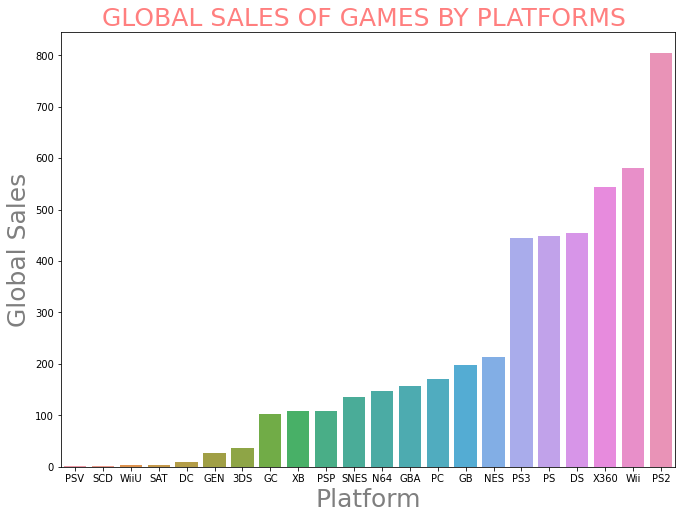

In [77]:
global_sales_by_pf = video_games.groupby('Platform').agg({'Global':np.sum}).sort_values('Global')
plt.subplots(figsize=(11,8))
ax = sns.barplot(x=global_sales_by_pf.index, y=global_sales_by_pf.Global)
ax.set_title('GLOBAL SALES OF GAMES BY PLATFORMS ', color='Red', size=25, alpha=0.5)
ax.set_xlabel('Platform', color='black', size=25, alpha=0.5)
ax.set_ylabel('Global Sales', color='black', size=25, alpha=0.5)

***Bar plot to visualize best platforms region wise***


Text(0.5, 1.0, 'REGION WISE BEST PERFORMING PLATFORMS')

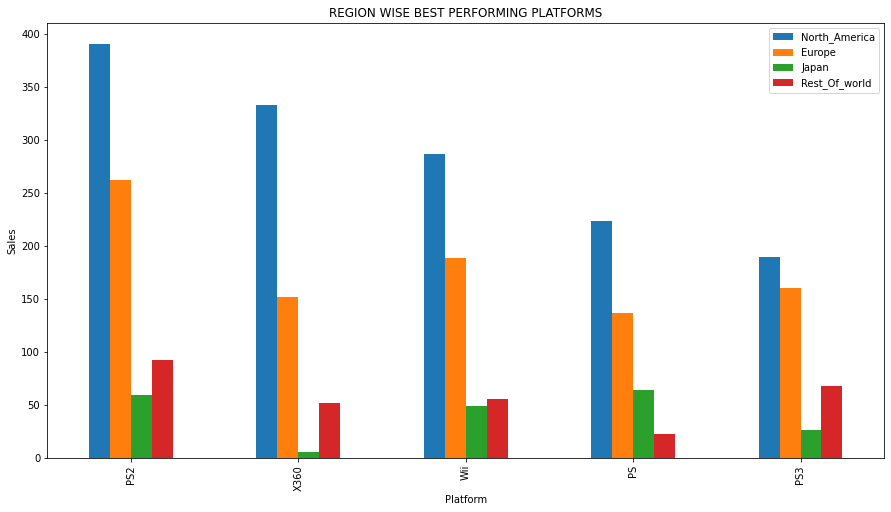

In [78]:
platreg=video_games.groupby('Platform').agg({'North_America':'sum','Europe':'sum','Japan':'sum','Rest_Of_world':'sum'})
platreg=platreg.sort_values('North_America',ascending=False).head(5)
platreg.plot(kind='bar',figsize=(15,8))
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title('REGION WISE BEST PERFORMING PLATFORMS')

***Box plot to visualize the performance of platforms over years***

([<matplotlib.axis.XTick at 0x7fb195f2ed90>,
 [Text(0, 0, '1983'),
  Text(0, 0, '1985'),
  Text(0, 0, '1987'),
  Text(0, 0, '1989'),
  Text(0, 0, '1991'),
  Text(0, 0, '1993'),
  Text(0, 0, '1995'),
  Text(0, 0, '1997'),
  Text(0, 0, '1999'),
  Text(0, 0, '2001'),
  Text(0, 0, '2003'),
  Text(0, 0, '2005'),
  Text(0, 0, '2007'),
  Text(0, 0, '2009'),
  Text(0, 0, '2011')])

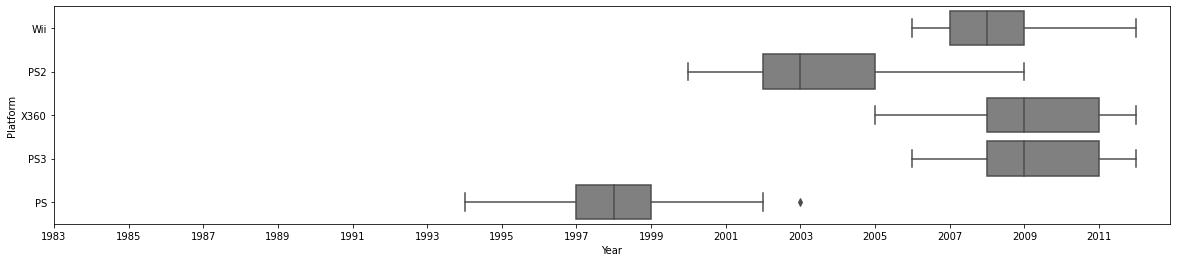

In [79]:
min_year = int(video_games['Year'].min())
max_year = int(video_games['Year'].max())

vg = video_games[video_games['Platform'].isin(['PS', 'PS2', 'PS3', 'X360', 'Wii'])]
plt.figure(figsize=(20,4))
sns.boxplot(data = vg, x = 'Year', y = 'Platform', color = 'grey')
plt.xlabel('Year')
plt.ylabel('Platform')
plt.xticks(range(min_year,max_year,2), range(min_year,max_year,2))

***Barplot to visualize best publishers region wise***

Text(0.5, 1.0, 'REGION WISE SALES FROM PUBLISHERS')

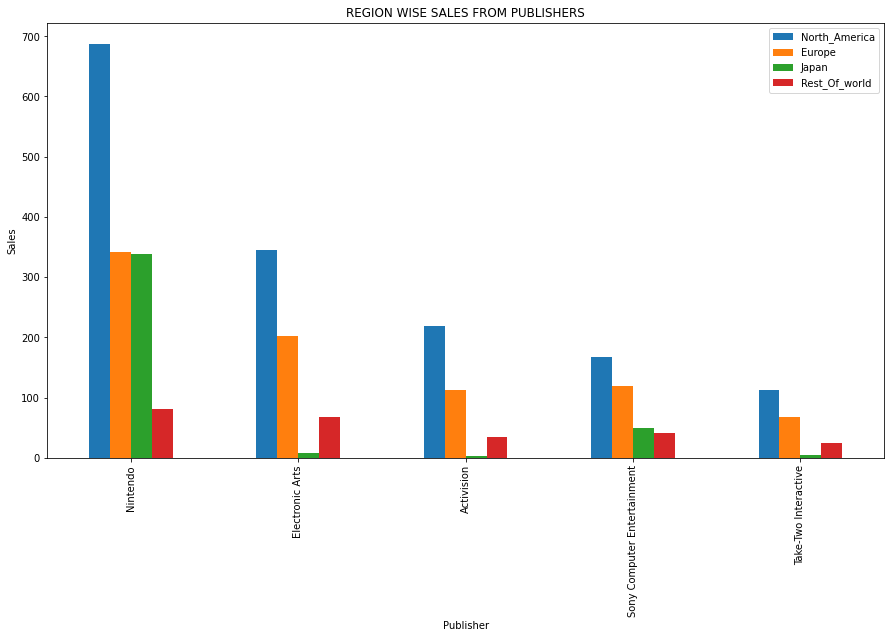

In [80]:
pubreg=video_games.groupby('Publisher').agg({'North_America':'sum','Europe':'sum','Japan':'sum','Rest_Of_world':'sum'})
pubreg=pubreg.sort_values('North_America',ascending=False).head(5)


pubreg.plot(kind='bar',figsize=(15,8))
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.title('REGION WISE SALES FROM PUBLISHERS')

***Barplot to visualize top genre across the globe by total sales***

Text(0, 0.5, 'Global Sales')

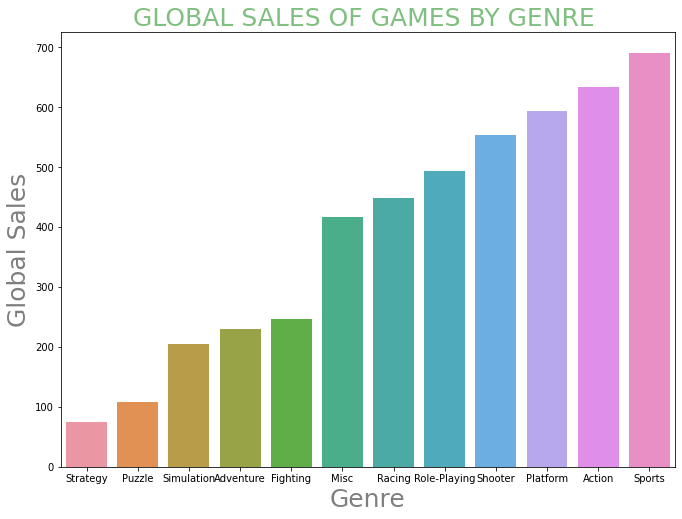

In [81]:
global_sales_by_genre = video_games.groupby('Genre').agg({'Global':np.sum}).sort_values('Global')
plt.subplots(figsize=(11,8))
ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Global)
ax.set_title('GLOBAL SALES OF GAMES BY GENRE ', color='Green', size=25, alpha=0.5)
ax.set_xlabel('Genre', color='black', size=25, alpha=0.5)
ax.set_ylabel('Global Sales', color='black', size=25, alpha=0.5)

***Pivot Table to visualise region wise average sales of each games based on genre***

In [82]:
genre=pd.DataFrame(video_games.groupby("Genre")[["North_America","Europe","Japan","Rest_Of_world","Global"]].sum())
genre.reset_index(level=0, inplace=True)
genrecount=pd.DataFrame(video_games["Genre"].value_counts())
genrecount.reset_index(level=0, inplace=True)
genrecount.rename(columns={"Genre": "Counts","index":"Genre"}, inplace=True)

genre=pd.merge(genre,genrecount,on="Genre")

In [83]:
table_data=genre[["Genre","North_America","Europe","Japan","Rest_Of_world","Global"]]
table_data = table_data.rename(columns = {"North_America": "North America", 
                                  "Europe":"Europe", 
                                  "Japan": "Japan","Rest_Of_world":"Other","Global":"Total"})

In [84]:
x=genre.Genre
NA_Perce=list(genre["North_America"]/genre["Global"]*100)
EU_Perce=list(genre["Europe"]/genre["Global"]*100)
JP_Perce=list(genre["Japan"]/genre["Global"]*100)
Other_Perce=list(genre["Rest_Of_world"]/genre["Global"]*100)

trace1 = go.Bar(
    x=x,
    y=NA_Perce,
    name="North America" ,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75)
trace2 = go.Bar(
    x=x,
    y=EU_Perce,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='red',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Europe",
    )
trace3 = go.Bar(
    x=x,
    y=JP_Perce,
    xaxis='x2', yaxis='y2',
  
    marker=dict(
        color='orange',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Japan",
    )
trace4 = go.Bar(
    x=x,
    y=Other_Perce,
    xaxis='x2', yaxis='y2',
    
    marker=dict(
        color='purple',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Other",)
trace5=go.Table(
  header = dict(
    values = table_data.columns,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["darkslateblue","blue","red", "orange","purple","green"]),
    align = ['left','center'],
    font = dict(color = 'white', size = 12),
     height=30,
  ),
  cells = dict(
    values = [table_data.Genre,round(table_data["North America"]),round(table_data["Europe"]), round(table_data["Japan"]), round(table_data["Other"]),round(table_data["Total"])],
    height=30,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["silver","rgb(158,202,225)","darksalmon", "gold","mediumorchid","yellowgreen"]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12)),
    domain=dict(x=[0.60,1],y=[0,0.95]),
)

data = [trace1, trace2,trace3,trace4,trace5]
layout = go.Layout(barmode='stack',autosize=False,width=1200,height=650,
                legend=dict(x=.58, y=0,orientation="h",font=dict(family='Courier New, monospace',size=11,color='#000'),
                           bgcolor='beige', bordercolor='beige', borderwidth=1),
                title='North America, Europe, Japan and Other Sales Percentage and Amounts According to Genre',
                titlefont=dict(family='Courier New, monospace',size=17,color='black'),
                xaxis2=dict(domain=[0, 0.50],anchor="y2", title='Genre',titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')), yaxis2=dict( domain=[0, 1],anchor='x2',title="Total Percentage",titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')),
                paper_bgcolor='beige',plot_bgcolor='beige',
                annotations=[ dict( text='Sales Percentage According to Region',x=0.08,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family="Courier New, monospace"),bgcolor="lightyellow",borderwidth=5),dict( text='Total Sales(In Millions)',x=0.9,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family='Courier New, monospace'),bgcolor="lightyellow",borderwidth=5)],
              
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

***Bubble chart for interactive visualization of release year with the game rankings***

In [88]:
video_game=video_games.head(100)
fig={
    "data" : [
    {
        'x': video_game.Rank,
        'y': video_game.Year,
        'mode': 'markers',
        'marker': {
            "color":video_game.Global,
            'size': video_game.Global,
            'showscale': True,
            "colorscale":'Blackbody'
        },
        "text" :  "Name:"+ video_game.Game_Title +","+" Publisher:" + video_game.Publisher
        
    },
],
"layout":
    {
    "title":"RELEASE YEARS OF GAMES BASED ON GLOBAL SALES AND RANKING",
    "xaxis":{
        "title":"Rank",
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    "yaxis":{
        "title":'Years',
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    
    "paper_bgcolor":'rgb(243, 243, 243)',
    "plot_bgcolor":'rgb(243, 243, 243)'
    }}

iplot(fig)

***Top 10 games by global sales***

In [89]:
top = pd.DataFrame(video_games.groupby("Game_Title")[["Global"]].sum().sort_values(by=['Global'],ascending=[False]).reset_index())
top.head(10)

,Game_Title,Global
0,Wii Sports,81.13
1,Super Mario Bros.,40.24
2,Tetris,35.84
3,Mario Kart Wii,33.56
4,Wii Sports Resort,31.52
5,New Super Mario Bros.,29.08
6,Wii Play,28.71
7,Duck Hunt,28.31
8,Call of Duty: Modern Warfare 3,27.52
9,Call of Duty: Black Ops,27.05


***Pie chart to visualize top 10 games sold globally***

In [90]:
pie1 = px.pie(top, values=top['Global'][:10], names=top['Game_Title'][:10],title='TOP 10 GAMES BY GLOBAL SALES', 
              color_discrete_sequence=px.colors.sequential.Purp_r)
pie1.update_traces(textposition='inside', textinfo='percent+label',showlegend=False)

pie1.show()

***Visuaizing global sales of games based on each region***


In [93]:
na = pd.DataFrame(video_games.groupby("Game_Title")[["North_America"]].mean().sort_values(by=['North_America'],ascending=[False]).reset_index())
na.rename(columns = {'Game_Title':'Name_NA'}, inplace = True)

eu = pd.DataFrame(video_games.groupby("Game_Title")[["Europe"]].mean().sort_values(by=['Europe'],ascending=[False]).reset_index())
eu.rename(columns = {'Game_Title':'Name_EU'}, inplace = True)

jp = pd.DataFrame(video_games.groupby("Game_Title")[["Japan"]].mean().sort_values(by=['Japan'],ascending=[False]).reset_index())
jp.rename(columns = {'Game_Title':'Name_JP'}, inplace = True)

other = pd.DataFrame(video_games.groupby("Game_Title")[["Rest_Of_world"]].mean().sort_values(by=['Rest_Of_world'],ascending=[False]).reset_index())
other.rename(columns = {'Game_Title':'Name_other'}, inplace = True)

#Concatenating the results.
name_df=pd.concat([na,eu,jp,other],axis=1)

In [94]:
subplot_name1 = make_subplots(rows=4, cols=1, shared_yaxes=True,subplot_titles=("TOP GAMES IN NORTH AMERICA","TOP GAMES IN EUROPE", "TOP GAMES IN JAPAN","TOP GAMES IN REST OF WORLD"))

#Subplot for North America
subplot_name1.add_trace(go.Bar(x=name_df['Name_NA'][:5], y=name_df['North_America'][:5],marker=dict(color=[1, 2, 3],coloraxis="coloraxis")),1, 1)

#Subplot for Europe
subplot_name1.add_trace(go.Bar(x=name_df['Name_EU'][:5], y=name_df['Europe'][:5],marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 2, 1)

#Subplot for Japan
subplot_name1.add_trace(go.Bar(x=name_df['Name_JP'][:5], y=name_df['Japan'][:5],marker=dict(color=[7, 8, 9], coloraxis="coloraxis")),3, 1)

#Subplot for other regions
subplot_name1.add_trace(go.Bar(x=name_df['Name_other'][:5], y=name_df['Rest_Of_world'][:5],marker=dict(color=[10, 11, 12], coloraxis="coloraxis")),4, 1)

subplot_name1.update_layout(height=1000,width=500,coloraxis=dict(colorscale='Mint_r'), showlegend=False)
subplot_name1.update_xaxes(tickangle=45)
subplot_name1.show()

***Point plot to visualize game titles by year of release***

Text(0, 0.5, 'Video games developed ')

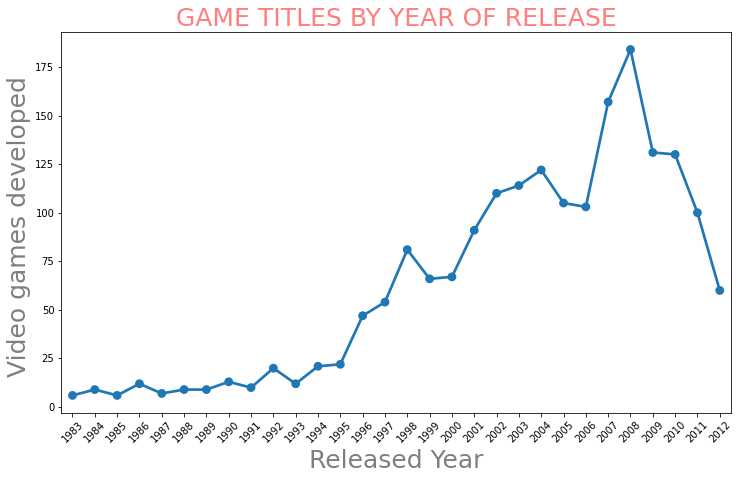

In [96]:
titles_by_year = video_games.groupby(['Year']).agg({'Game_Title':lambda x : len(x) if (len(x) > 1) else None}).dropna()
plt.subplots(figsize=(12,7))
ax = sns.pointplot(x=titles_by_year.index, y=titles_by_year.Game_Title)
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('GAME TITLES BY YEAR OF RELEASE', size=25, color='red', alpha=0.5)
ax.set_xlabel('Released Year', size=25, color='black', alpha=0.5)
ax.set_ylabel('Video games developed ', size=25, color='black', alpha=0.5)

***Errorbar to visualize sales over years***

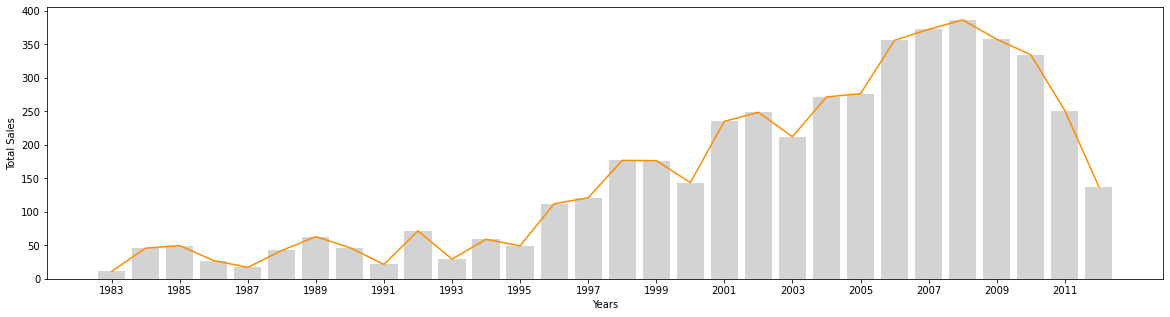

In [97]:
plt.figure(figsize=(20,5))

min_year = int(video_games['Year'].min())
max_year = int(video_games['Year'].max())

plt.errorbar(video_games.groupby('Year')['Global'].sum().index, video_games.groupby('Year')['Global'].sum().values, color='darkorange')
plt.bar(video_games.groupby('Year')['Global'].sum().sort_values().index, video_games.groupby('Year')['Global'].sum().sort_values().values, color='lightgray')
plt.xlabel('Years')
plt.ylabel('Total Sales')
plt.xticks(range(min_year,max_year,2), range(min_year,max_year,2))
plt.show()

***Printing the data between the years having peak sales (2007-2008)***

In [98]:
vg = video_games[video_games['Year']==2008]

vg

,index,Rank,Game_Title,Platform,Year,Genre,Publisher,North_America,Europe,Japan,Rest_Of_world,Global,Review
2,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.56,82.07
37,37,38,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,5.90,2.28,2.47,0.93,11.58,93.00
46,46,47,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.21,2.85,0.13,0.99,10.18,91.00
53,53,54,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.39,3.38,0.39,1.50,9.66,91.00
74,74,75,Pokémon Platinum Version,DS,2008,Role-Playing,Nintendo,2.68,1.62,2.69,0.53,7.52,89.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,1872,1873,Fallout 3,PC,2008,Role-Playing,Bethesda Softworks,0.00,0.78,0.00,0.06,0.84,90.69
1882,1882,1883,Sonic Unleashed,X360,2008,Platform,Sega,0.45,0.30,0.00,0.09,0.84,69.00
1884,1884,1885,Petz Dogz Fashion,DS,2008,Simulation,Ubisoft,0.45,0.30,0.00,0.09,0.84,64.00
1893,1893,1894,GRID,X360,2008,Racing,Codemasters,0.32,0.41,0.01,0.09,0.83,86.54


***Visualizing the sales of the year 2008***

In [99]:

video_game=vg
fig={
    "data" : [
    {
        'x': video_game.Game_Title,
        'y': video_game.Global,
        'mode': 'markers',
        'marker': {
            "color":video_game.Global,
            'size': video_game.Global,
            'showscale': True,
            "colorscale":'Blackbody'
        },
        "text" :  "Genre:"+ video_game.Genre +","+" Publisher:" + video_game.Publisher
        
    },
],
"layout":
    {
    "title":"PREFERRED GENRE AND GAME IN THE YEAR 2008",
    "xaxis":{
        "title":"",
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    "yaxis":{
        "title":'',
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    
    "paper_bgcolor":'rgb(243, 243, 243)',
    "plot_bgcolor":'rgb(243, 243, 243)'
    }}

iplot(fig)

***Review based Analysis***

In [100]:
#review = video_games.groupby("Game_Title")[["Game_Title", "Review"]].sort_values(by=['Review'],ascending=[False])
#for key, item in review:
#    print(review.get_group(key), "\n\n")
video_games.sort_values("Review", ascending=False)

,index,Rank,Game_Title,Platform,Year,Genre,Publisher,North_America,Europe,Japan,Rest_Of_world,Global,Review
73,73,74,The Legend of Zelda: Ocarina of Time,N64,1998,Adventure,Nintendo,4.10,1.89,1.45,0.16,7.60,97.00
821,821,822,The Orange Box,X360,2007,Shooter,Electronic Arts,1.04,0.48,0.02,0.17,1.71,96.36
411,411,412,Metroid Prime,GC,2002,Shooter,Nintendo,1.96,0.67,0.10,0.09,2.82,96.35
78,78,79,Tekken 3,PS,1998,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.18,96.30
461,461,462,BioShock,X360,2007,Shooter,Take-Two Interactive,1.46,0.81,0.05,0.26,2.58,96.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,953,954,High School Musical 3: Senior Year,DS,2008,Misc,Disney Interactive Studios,0.60,0.75,0.00,0.17,1.52,35.00
1558,1558,1559,Dora the Explorer: Dora Saves the Mermaids,DS,2007,Platform,Take-Two Interactive,0.94,0.00,0.00,0.08,1.02,34.00
1387,1387,1388,High School Musical 2: Work This Out!,DS,2008,Misc,Disney Interactive Studios,0.49,0.52,0.00,0.13,1.14,33.00
1237,1237,1238,Jillian Michaels' Fitness Ultimatum 2009,Wii,2008,Sports,Deep Silver,0.94,0.20,0.00,0.11,1.25,31.00


In [101]:
review = pd.DataFrame(video_games.groupby("Game_Title")[["Review"]].mean().sort_values(by=['Review'],ascending=[False]).reset_index())
review_top =review.head(10)
print(review_top)
review_low =review.tail(10)
print(review_low)

                               Game_Title  Review
0                           Metroid Prime  96.350
1                                Tekken 3  96.300
2                    Halo: Combat Evolved  95.540
3                             Half-Life 2  95.480
4     Metal Gear Solid 2: Sons of Liberty  95.040
5              Uncharted 2: Among Thieves  95.000
6    The Legend of Zelda: Ocarina of Time  95.000
7                   Batman: Arkham Asylum  94.985
8                                BioShock  94.845
9  The Legend of Zelda: Twilight Princess  94.790
                                      Game_Title  Review
1495                                    Baseball   39.00
1496                     Dragon Ball Z: Taiketsu   38.15
1497                  The Simpsons Skateboarding   37.58
1498                        Pong: The Next Level   37.00
1499   High School Musical 3: Senior Year DANCE!   36.00
1500          High School Musical 3: Senior Year   35.00
1501  Dora the Explorer: Dora Saves the Mermaids   

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



[Text(0, 0, 'Action'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Misc'),
 Text(0, 0, 'Platform'),
 Text(0, 0, 'Puzzle'),
 Text(0, 0, 'Racing'),
 Text(0, 0, 'Role-Playing'),
 Text(0, 0, 'Shooter'),
 Text(0, 0, 'Simulation'),
 Text(0, 0, 'Sports'),
 Text(0, 0, 'Strategy')]

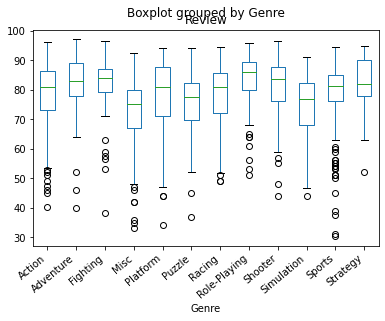

In [102]:
review = video_games.boxplot(by ='Genre', column =['Review'], grid = False)
review.set_xticklabels(review.get_xticklabels(), rotation=40, ha="right")